Imports


In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA

Wczytanie danych


In [2]:
data_bankructwo = pd.read_csv('data_bankructwo.csv')

Usunięcie spacji z początków nazw kolumn

In [3]:
data_bankructwo.columns = data_bankructwo.columns.str.lstrip()

**Data Prcoessing**

---



Sprawdzenie typów kolumn-numeric

In [5]:
data_bankructwo.dtypes

Bankrupt?                                                    int64
ROA(C) before interest and depreciation before interest    float64
ROA(B) before interest and depreciation after tax          float64
Operating Gross Margin                                     float64
Realized Sales Gross Margin                                float64
Operating Profit Rate                                      float64
Non-industry income and expenditure/revenue                float64
Operating Expense Rate                                     float64
Research and development expense rate                      float64
Cash flow rate                                             float64
Net Value Per Share (B)                                    float64
Net Value Per Share (A)                                    float64
Net Value Per Share (C)                                    float64
Revenue Per Share (Yuan ¥)                                 float64
Operating Profit Per Share (Yuan ¥)                        flo

Zsumowanie brakujących wartości



In [6]:
data_bankructwo.isna().sum()

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    1
ROA(B) before interest and depreciation after tax          1
Operating Gross Margin                                     2
Realized Sales Gross Margin                                0
Operating Profit Rate                                      2
Non-industry income and expenditure/revenue                1
Operating Expense Rate                                     0
Research and development expense rate                      0
Cash flow rate                                             0
Net Value Per Share (B)                                    0
Net Value Per Share (A)                                    0
Net Value Per Share (C)                                    0
Revenue Per Share (Yuan ¥)                                 0
Operating Profit Per Share (Yuan ¥)                        0
Per Share Net profit before tax (Yuan ¥)                   0
Realized Sales Gross Pro

Usunięcie brakujących wartości 
--z 518 otrzymujemy 498 wierszy

In [18]:
data_bankructwo=data_bankructwo.dropna()

Szukanie wartości odstających - patrzymy na maksymalną wartość i średnią, zbyt duża róznica między nimi sugeruję występowanie zmiennych odtsających

In [7]:
data_bankructwo.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,...,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Current Liability to Liability,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,Net Income to Total Assets,Total assets to GNP price,Gross Profit to Sales
count,519.000000,518.000000,518.000000,517.000000,519.000000,517.000000,518.000000,5.190000e+02,5.190000e+02,519.000000,...,5.110000e+02,519.000000,5.190000e+02,519.000000,519.000000,519.000000,519.000000,519.000000,5.170000e+02,519.000000
mean,0.423892,0.461183,0.508884,0.601984,0.601992,0.998890,0.303132,2.416693e+09,1.153038e+09,0.464591,...,3.634491e+09,0.593908,2.467741e+09,0.663041,0.122327,0.638686,0.457322,0.775979,3.872340e+07,0.601970
std,0.494650,0.068236,0.075666,0.011833,0.011797,0.000483,0.003353,3.489484e+09,1.940717e+09,0.010281,...,3.523289e+09,0.000955,2.515321e+09,0.219522,0.052654,0.035759,0.022977,0.063558,5.514557e+08,0.011812
min,0.000000,0.024277,0.033514,0.532906,0.532906,0.991888,0.235090,1.004881e-04,0.000000e+00,0.343818,...,0.000000e+00,0.572892,1.005218e-04,0.049582,0.000000,0.167678,0.073969,0.411809,1.323021e-04,0.532907
25%,0.000000,0.444109,0.493790,0.596780,0.596985,0.998898,0.303306,1.547216e-04,0.000000e+00,0.460927,...,1.781726e-04,0.593900,3.705000e+08,0.509076,0.111446,0.634040,0.457817,0.769126,1.568051e-03,0.596862
50%,0.000000,0.477648,0.529552,0.601522,0.601457,0.998974,0.303471,3.451749e-04,2.380000e+08,0.463362,...,3.650000e+09,0.593933,1.640000e+09,0.692062,0.116141,0.641963,0.459120,0.796381,4.238395e-03,0.601461
75%,1.000000,0.498135,0.549267,0.605933,0.605868,0.999030,0.303540,5.620000e+09,1.360000e+09,0.467240,...,6.995000e+09,0.593966,3.785000e+09,0.838761,0.121445,0.648634,0.460331,0.808082,9.773677e-03,0.605897
max,1.000000,0.589139,0.632743,0.665151,0.665151,0.999254,0.305396,9.960000e+09,9.920000e+09,0.545963,...,9.980000e+09,0.598485,9.740000e+09,1.000000,0.922128,0.751791,0.497084,0.874452,9.170000e+09,0.665149


Funckja znajdująca wartości odstające w danych

In [8]:
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return outliers

In [9]:
for i in data_bankructwo.columns:

  outliers = find_outliers_IQR(data_bankructwo[i])
  display(outliers)

Series([], Name: Bankrupt?, dtype: int64)

10     0.066933
22     0.345781
29     0.311315
53     0.360796
68     0.024277
81     0.201969
83     0.270365
88     0.356701
89     0.280310
93     0.207722
98     0.277726
99     0.310974
102    0.233852
104    0.208161
108    0.348608
131    0.353678
137    0.340175
140    0.240579
142    0.247502
147    0.361527
156    0.325793
169    0.278214
170    0.330181
172    0.102325
174    0.242822
176    0.258665
184    0.324477
187    0.335543
191    0.126456
199    0.299810
202    0.343977
210    0.331595
211    0.320626
212    0.356018
216    0.196802
217    0.337640
218    0.340028
403    0.589139
Name: ROA(C) before interest and depreciation before interest, dtype: float64

0      0.405750
10     0.054821
22     0.386584
25     0.404144
29     0.360887
53     0.398094
68     0.033514
81     0.228652
83     0.291397
88     0.398576
89     0.301354
93     0.237272
98     0.307351
99     0.343220
102    0.333423
104    0.226725
108    0.345950
115    0.389528
131    0.393918
137    0.364420
140    0.263451
142    0.275015
147    0.402056
156    0.359441
169    0.305530
170    0.353445
172    0.112212
174    0.212966
176    0.290219
184    0.344237
186    0.363778
187    0.375395
191    0.112426
195    0.208362
199    0.345147
202    0.384603
210    0.372183
211    0.345415
212    0.385674
216    0.221425
217    0.378446
218    0.380213
403    0.632743
Name: ROA(B) before interest and depreciation after tax, dtype: float64

28     0.665151
33     0.555939
79     0.532906
84     0.623013
88     0.622213
96     0.622595
101    0.578648
102    0.627106
109    0.540776
133    0.631992
137    0.626414
142    0.536812
145    0.580702
149    0.578165
150    0.643105
157    0.619770
159    0.621564
165    0.550282
167    0.625074
170    0.579909
175    0.626436
177    0.560905
192    0.540891
211    0.640388
218    0.581466
220    0.619950
225    0.623712
229    0.621773
233    0.636259
234    0.622177
240    0.626544
248    0.622703
252    0.625326
256    0.635718
257    0.624317
259    0.620944
263    0.626414
275    0.620397
279    0.636785
280    0.623986
286    0.625600
294    0.619863
298    0.620454
302    0.637606
303    0.620526
309    0.622919
Name: Operating Gross Margin, dtype: float64

3      0.583541
28     0.665151
33     0.555939
79     0.532906
84     0.623013
88     0.622213
96     0.622595
101    0.578648
102    0.627106
109    0.540776
133    0.631992
137    0.626414
142    0.536812
145    0.580702
149    0.578165
150    0.643105
157    0.619770
159    0.621579
165    0.550282
167    0.624454
170    0.579909
175    0.626436
177    0.560861
192    0.540891
211    0.640388
218    0.581466
220    0.619950
225    0.623712
229    0.621773
233    0.636252
234    0.622256
240    0.626544
248    0.622530
252    0.625326
256    0.635718
257    0.624288
259    0.620944
262    0.619525
263    0.626414
275    0.620397
279    0.636785
280    0.623906
282    0.619330
286    0.625600
294    0.620058
298    0.620454
302    0.637606
303    0.620382
305    0.619568
309    0.622919
Name: Realized Sales Gross Margin, dtype: float64

28     0.996295
29     0.998511
33     0.998291
48     0.998589
49     0.998684
66     0.998534
68     0.994015
79     0.994729
81     0.998625
83     0.998093
84     0.998633
85     0.998292
88     0.998483
89     0.998414
101    0.998496
104    0.998481
109    0.997789
112    0.997783
121    0.998506
123    0.998644
131    0.998692
133    0.998131
134    0.998258
136    0.998307
137    0.997763
142    0.997904
145    0.998506
148    0.998568
149    0.998648
159    0.999254
165    0.991888
170    0.997091
174    0.998155
177    0.998284
184    0.998602
186    0.998691
189    0.998692
192    0.997517
195    0.998647
199    0.998452
210    0.998665
211    0.998554
218    0.998372
324    0.998684
393    0.998608
403    0.999232
Name: Operating Profit Rate, dtype: float64

0      0.302646
2      0.302035
10     0.302760
22     0.301379
28     0.272989
         ...   
438    0.302916
443    0.302886
450    0.302453
485    0.304167
495    0.303944
Name: Non-industry income and expenditure/revenue, Length: 73, dtype: float64

Series([], Name: Operating Expense Rate, dtype: float64)

15     3.920000e+09
38     4.140000e+09
40     9.850000e+09
42     3.770000e+09
61     7.230000e+09
           ...     
456    3.970000e+09
460    7.620000e+09
466    4.890000e+09
503    4.620000e+09
507    7.790000e+09
Name: Research and development expense rate, Length: 61, dtype: float64

49     0.543068
68     0.437971
79     0.434324
82     0.446513
84     0.486569
99     0.447003
102    0.435681
104    0.447321
135    0.488644
137    0.343818
138    0.476878
165    0.443760
169    0.449636
192    0.448138
228    0.478767
234    0.488241
241    0.495881
257    0.487183
280    0.485863
287    0.493435
301    0.481530
303    0.485916
328    0.476869
329    0.545963
354    0.502562
355    0.481424
362    0.485618
366    0.477086
370    0.481011
379    0.478356
380    0.480303
389    0.480087
403    0.482207
411    0.449714
427    0.482125
456    0.478775
458    0.479953
474    0.482729
479    0.485344
496    0.502671
504    0.479255
Name: Cash flow rate, dtype: float64

10     0.120012
97     0.120180
98     0.102398
109    0.120602
139    0.217606
148    0.116599
183    0.218659
216    0.069656
312    0.220303
313    0.226244
330    0.226076
337    0.219923
338    0.220766
355    0.226581
362    0.239476
363    0.236568
380    0.248704
417    0.244364
464    0.231722
511    0.227171
Name: Net Value Per Share (B), dtype: float64

10     0.120012
97     0.120180
98     0.102398
109    0.120602
139    0.217606
148    0.116599
149    0.113354
183    0.218659
216    0.069656
312    0.220303
313    0.226244
330    0.226076
337    0.219923
338    0.220766
355    0.226581
362    0.239476
363    0.236568
380    0.248704
417    0.244364
464    0.231722
511    0.227171
Name: Net Value Per Share (A), dtype: float64

10     0.120012
97     0.120180
98     0.102398
109    0.120602
139    0.217606
148    0.116599
149    0.113354
183    0.218659
216    0.069656
312    0.220303
313    0.226244
330    0.226076
337    0.219923
338    0.220766
355    0.226581
362    0.239476
363    0.236568
380    0.248704
417    0.244364
464    0.231722
511    0.227171
Name: Net Value Per Share (C), dtype: float64

43     0.061346
86     0.084275
97     0.093244
98     0.235976
103    0.087103
117    0.108807
143    0.067955
146    0.166039
163    0.064023
166    0.081507
173    0.313928
179    0.065414
182    0.075336
193    0.065702
194    0.099596
206    0.067713
223    0.078664
238    0.062329
246    0.080327
267    0.062238
269    0.073294
278    0.065717
290    0.068984
292    0.083019
301    0.091928
370    0.072115
417    0.063252
418    0.063660
421    0.239802
465    0.066700
468    0.191085
515    0.113662
Name: Revenue Per Share (Yuan ¥), dtype: float64

10     0.066200
29     0.055940
68     0.051136
81     0.030535
83     0.040795
85     0.050240
89     0.066770
97     0.014820
100    0.065386
101    0.041365
102    0.052927
103    0.126700
104    0.052357
108    0.056917
127    0.128980
142    0.018158
146    0.000000
148    0.061559
156    0.046413
172    0.063838
173    0.130527
174    0.060256
182    0.052439
191    0.060500
192    0.066363
193    0.054556
199    0.066526
218    0.050566
515    0.128735
Name: Operating Profit Per Share (Yuan ¥), dtype: float64

10     0.067485
29     0.089403
34     0.121187
43     0.122392
68     0.121413
81     0.090382
82     0.111697
83     0.080289
85     0.091512
93     0.076147
97     0.084884
98     0.000000
101    0.113128
102    0.121036
104    0.101454
109    0.079461
117    0.118024
131    0.098064
142    0.098516
146    0.082775
147    0.081720
148    0.085561
156    0.088725
166    0.112902
172    0.099721
176    0.098893
191    0.107705
193    0.115839
199    0.093771
210    0.123145
216    0.054304
217    0.091738
218    0.106274
362    0.221134
363    0.211720
380    0.225879
417    0.218950
464    0.213226
515    0.219854
Name: Per Share Net profit before tax (Yuan ¥), dtype: float64

2      0.022760
5      0.021565
7      0.022951
8      0.022460
14     0.024187
         ...   
485    0.022551
489    0.022573
493    0.022368
499    0.022343
518    0.022271
Name: Realized Sales Gross Profit Growth Rate, Length: 69, dtype: float64

6      0.848455
10     0.847569
14     0.848349
15     0.846242
23     0.848401
         ...   
471    0.846860
478    0.848402
499    0.848988
500    0.848390
513    0.846852
Name: Operating Profit Growth Rate, Length: 75, dtype: float64

5      6.080000e+08
6      6.540000e+08
16     1.128208e-04
27     1.217934e-04
29     1.800000e+08
           ...     
498    5.640000e+08
501    6.240000e+08
506    8.040000e+08
507    6.730000e+08
515    1.001546e-04
Name: Total Asset Growth Rate, Length: 81, dtype: float64

4      0.265218
10     0.256152
22     0.261875
24     0.265498
25     0.261669
         ...   
219    0.261310
243    0.265443
395    0.265057
457    0.265306
497    0.262452
Name: Total Asset Return Growth Rate Ratio, Length: 63, dtype: float64

10     0.327158
12     0.337385
16     0.335131
34     0.356553
36     0.344855
         ...   
218    0.355128
328    0.403487
405    0.362310
458    0.394797
497    0.397461
Name: Cash Reinvestment %, Length: 65, dtype: float64

9      3.478419e-02
10     1.265724e-01
28     4.445052e-02
29     6.488679e-01
32     3.250622e-02
34     5.811470e-02
43     4.259842e-02
46     3.559033e-02
49     3.470000e+09
70     3.238859e-02
83     3.761114e-02
89     9.497442e-02
92     3.506507e-02
93     5.086897e-01
97     3.786201e-01
98     1.039978e-01
101    3.419874e-02
104    4.823316e-02
109    9.012667e-02
112    1.172252e-01
127    3.224997e-02
131    1.559452e-01
142    4.529770e-02
146    1.000000e+00
148    7.693942e-02
149    1.217967e-01
156    2.889311e-01
177    3.298772e-02
191    4.159440e-02
193    4.772340e-02
198    3.288649e-02
210    3.448235e-02
217    8.512753e-02
218    8.623004e-02
421    3.883767e-02
Name: Total debt/Total net worth, dtype: float64

6      0.016896
8      0.007769
9      0.012126
10     0.000633
20     0.009638
36     0.011222
45     0.011952
51     0.007736
93     0.042676
118    0.007873
131    0.010220
140    0.008932
146    1.000000
153    0.007976
156    0.014132
177    0.010328
198    0.010834
199    0.007984
201    0.007929
205    0.007756
216    0.000000
220    0.008044
224    0.008130
247    0.008407
270    0.009133
293    0.008648
313    0.008068
315    0.008011
321    0.008574
340    0.008203
346    0.012372
368    0.012371
372    0.009122
383    0.007854
403    0.007690
421    0.009129
468    0.008693
495    0.008007
505    0.008024
506    0.008692
Name: Contingent liabilities/Net worth, dtype: float64

10     0.292354
98     0.410795
102    0.451274
103    0.352324
117    0.281859
146    0.355322
163    0.313343
172    0.335832
173    0.629685
191    0.271364
194    0.313343
206    0.265367
223    0.347826
246    0.389805
269    0.401799
278    0.298351
290    0.263868
292    0.439280
301    0.385307
345    0.259370
370    0.320840
421    0.419790
465    0.265367
468    0.484258
512    0.257871
515    0.386807
Name: Total Asset Turnover, dtype: float64

4      5.811142e-02
9      5.979760e-02
28     7.050000e+09
36     5.947446e-02
47     1.050747e-01
56     6.138096e-02
58     7.536096e-02
62     6.084926e-02
65     8.512551e-02
70     7.289338e-02
77     8.004641e-02
82     7.081944e-02
86     1.474406e-01
94     7.345740e-02
95     1.083912e-01
97     1.185641e-01
98     1.283345e-01
103    1.336927e-01
106    8.398866e-02
117    1.629482e-01
118    5.843750e-02
119    1.257260e-01
120    1.627425e-01
122    1.029508e-01
127    1.777977e-01
128    1.231438e-01
129    1.639440e-01
130    6.413348e-02
132    6.142209e-02
135    2.927897e-01
146    9.301882e-02
172    1.174096e-01
173    2.916998e-01
178    1.940837e-01
181    1.067491e-01
184    7.502607e-02
194    8.208804e-02
206    1.141372e-01
207    1.583126e-01
216    6.842237e-02
232    1.049190e-01
255    1.101508e-01
278    1.237431e-01
301    1.997268e-01
319    1.147335e-01
320    8.664424e-02
321    6.830486e-02
344    1.296682e-01
345    1.355463e-01
346    7.223830e-02


10     0.370209
11     0.368761
33     0.358823
49     0.358721
56     0.408562
         ...   
362    0.425906
370    0.422379
372    0.410642
380    0.420931
403    0.411049
Name: Operating profit per person, Length: 78, dtype: float64

2      1.410163e-01
8      5.942353e-02
14     1.609639e-01
18     5.364974e-02
19     6.601351e-02
33     5.351674e-02
44     8.925203e-02
49     6.647343e-02
50     8.667846e-02
51     8.459300e-02
52     9.145687e-02
54     7.552404e-02
55     8.168291e-02
56     6.133538e-02
57     1.019641e-01
58     9.553596e-02
62     7.273473e-02
119    2.968065e-01
121    2.148332e-01
122    5.966399e-02
128    2.109519e-01
133    3.540086e-01
134    2.991163e-01
135    1.850283e-01
136    2.787261e-01
144    3.480000e+09
149    6.213767e-01
152    7.936497e-02
158    5.320088e-02
159    1.281282e-01
164    7.862780e-02
171    9.132513e-02
177    1.008666e-01
190    5.548820e-02
232    6.665222e-02
255    6.495093e-02
301    5.618265e-02
312    6.796959e-02
321    8.225974e-02
337    6.762428e-02
346    7.011084e-02
355    5.425562e-02
362    7.191995e-02
371    6.389347e-02
380    6.754918e-02
394    7.675441e-02
438    1.525373e-01
454    6.127285e-02
485    2.493918e-01
501    5.646880e-02


98     0.806118
104    0.722708
105    0.831287
115    0.728138
118    0.748745
137    0.775138
142    0.689309
163    0.719796
202    0.690692
215    0.700512
328    0.686689
Name: Quick Assets/Total Assets, dtype: float64

97     0.885585
98     0.943633
122    0.918246
127    0.942712
142    0.885368
144    0.988767
173    0.995453
421    0.898424
468    0.921918
Name: Current Assets/Total Assets, dtype: float64

10     0.210915
61     0.174404
82     0.148288
85     0.353707
102    0.285880
118    0.146474
137    0.355407
143    0.159119
163    0.151601
166    0.151173
173    0.136518
174    0.329174
182    0.159874
186    0.475348
187    0.259600
202    0.281878
206    0.173804
210    0.154454
222    0.145189
235    0.139413
237    0.207866
281    0.240895
287    0.184054
291    0.149971
306    0.151494
310    0.142006
328    0.521109
332    0.163040
341    0.169366
353    0.257405
364    0.168457
378    0.317872
427    0.152035
443    0.186306
458    0.230669
470    0.137499
Name: Cash/Total Assets, dtype: float64

49     0.107927
68     0.014598
99     0.014694
118    0.015661
137    0.074065
138    0.024954
157    0.018178
186    0.016558
234    0.023000
257    0.017905
258    0.014902
268    0.016229
280    0.014622
281    0.018447
287    0.022577
291    0.017927
303    0.016186
304    0.016667
310    0.017975
317    0.022506
318    0.015812
329    0.070722
347    0.019024
354    0.051416
364    0.018315
367    0.021965
368    0.024031
370    0.015723
373    0.016140
379    0.016568
389    0.018508
411    0.017225
416    0.022798
432    0.014760
458    0.014679
479    0.016097
496    0.028793
Name: Quick Assets/Current Liability, dtype: float64

2      5.340000e+09
33     6.730000e+09
46     3.110000e+09
49     2.419698e-02
53     2.480000e+08
61     1.154531e-02
62     7.660000e+09
77     4.440000e+08
79     1.409194e-02
82     1.538614e-02
84     4.790000e+08
85     1.733125e-02
102    1.403445e-02
112    1.140000e+09
119    3.540000e+09
123    6.840000e+09
128    6.960000e+08
134    3.370000e+09
137    9.768759e-02
138    1.091796e-02
144    2.090000e+09
158    9.010000e+09
174    2.612786e-02
186    3.616278e-02
192    1.221869e-02
202    1.650374e-02
214    5.390000e+09
222    1.319021e-02
234    1.303333e-02
235    1.074440e-02
241    1.455006e-02
264    1.102881e-02
268    1.356230e-02
273    1.075769e-02
281    2.003773e-02
287    3.207749e-02
291    1.905244e-02
310    2.505294e-02
318    1.091806e-02
328    2.846381e-02
329    2.945216e-02
332    1.441879e-02
341    1.426803e-02
353    1.793959e-02
364    2.023872e-02
370    1.086663e-02
371    9.650000e+09
373    1.168289e-02
378    2.112319e-02
379    1.164174e-02


93     0.302765
97     0.307686
98     0.336844
109    0.343143
Name: Current Liability to Assets, dtype: float64

12     0.321583
49     0.585877
68     0.273004
79     0.320634
81     0.319743
82     0.320819
84     0.378054
98     0.315183
102    0.264321
104    0.298432
106    0.372701
127    0.319095
129    0.322662
135    0.413579
137    0.026274
169    0.308195
174    0.367748
181    0.320294
186    0.320433
202    0.318597
241    0.437756
287    0.405179
301    0.372728
305    0.374417
309    0.371139
319    0.372268
328    0.386272
367    0.369800
370    0.385649
378    0.371310
389    0.367542
405    0.318798
410    0.373713
411    0.306490
427    0.375240
456    0.379350
458    0.389112
474    0.379238
496    0.406086
Name: Operating Funds to Liability, dtype: float64

8      7.271765e-02
14     8.509660e-02
23     5.938674e-02
26     7.000000e+09
29     4.755434e-02
31     5.450000e+09
53     4.900138e-02
54     4.671904e-02
73     4.342901e-02
101    7.452524e-02
136    5.038409e-02
146    4.353975e-02
148    1.230899e-01
149    1.000000e+00
150    2.405461e-01
152    4.637182e-02
159    1.294633e-01
165    5.145545e-02
168    5.630423e-02
171    6.770570e-02
177    1.378383e-01
192    4.498449e-02
224    6.412653e-02
239    4.685822e-02
247    1.016790e-01
262    4.559511e-02
270    8.206890e-02
285    4.509496e-02
293    9.091379e-02
308    6.163285e-02
312    6.839402e-02
328    8.010000e+09
338    4.508398e-02
387    4.899938e-02
389    8.130000e+08
411    8.480000e+08
428    4.962824e-02
477    7.474033e-02
478    4.472583e-02
Name: Long-term Liability to Current Assets, dtype: float64

7      0.868461
10     0.841966
29     0.846495
40     0.872128
68     0.854834
79     0.872770
81     0.838189
83     0.837568
89     0.816213
93     0.871284
104    0.858314
109    0.804014
112    0.869388
135    0.828565
137    0.873136
140    0.745877
142    0.867908
145    0.842347
148    0.843977
169    0.847514
170    0.878070
172    0.829937
174    0.795535
175    0.872555
176    0.873295
186    0.762047
187    0.860451
191    0.808267
195    0.729196
198    0.878007
199    0.860613
202    0.868609
207    0.876917
211    0.822655
215    0.873937
216    0.777637
217    0.852516
218    0.879445
349    0.860211
Name: Retained Earnings to Total Assets, dtype: float64

33     0.001634
127    0.002820
142    0.000971
177    0.001603
328    0.002868
329    0.003076
355    0.002870
362    0.003280
363    0.002982
380    0.003550
403    0.002903
427    0.002782
474    0.002796
495    0.003281
Name: Total income/Total expense, dtype: float64

Series([], Name: Current Asset Turnover Rate, dtype: float64)

Series([], Name: Quick Asset Turnover Rate, dtype: float64)

2      0.594502
7      0.593789
22     0.593799
28     0.572892
33     0.593753
34     0.593797
46     0.593801
48     0.593773
61     0.594073
63     0.593736
68     0.594351
73     0.593745
79     0.594194
88     0.594216
109    0.593187
112    0.593370
120    0.594174
121    0.595007
122    0.594114
123    0.595328
125    0.594848
126    0.594131
130    0.594070
132    0.594083
133    0.598485
134    0.594412
136    0.594257
137    0.594300
144    0.594907
149    0.593798
150    0.593567
152    0.593770
157    0.594213
158    0.593441
165    0.594274
177    0.593628
189    0.593739
192    0.594151
329    0.594137
354    0.594074
394    0.593787
438    0.593672
485    0.593544
518    0.593796
Name: Working capitcal Turnover Rate, dtype: float64

99     9.470000e+09
121    9.390000e+09
129    9.460000e+09
138    9.330000e+09
166    8.910000e+09
200    9.240000e+09
264    9.670000e+09
321    9.740000e+09
373    9.190000e+09
399    9.590000e+09
416    9.030000e+09
425    8.970000e+09
447    9.270000e+09
460    9.440000e+09
Name: Cash Turnover Rate, dtype: float64

Series([], Name: Current Liability to Liability, dtype: float64)

8      0.149144
10     0.025851
14     0.140327
29     0.922128
42     0.142463
52     0.144659
58     0.136933
62     0.137918
78     0.137903
89     0.176969
92     0.146503
99     0.136528
101    0.191478
112    0.217743
131    0.168665
136    0.145009
146    0.862994
148    0.000000
149    0.480440
150    0.155345
156    0.276977
159    0.137702
177    0.159270
188    0.141099
192    0.149585
193    0.147996
198    0.136465
200    0.138359
210    0.143609
216    0.090263
217    0.144985
218    0.216878
428    0.137667
475    0.136885
Name: Equity to Long-term Liability, dtype: float64

3      0.579039
10     0.705153
49     0.581215
53     0.603664
66     0.583631
         ...   
468    0.677208
470    0.701665
474    0.604777
508    0.603422
509    0.594351
Name: Cash Flow to Total Assets, Length: 74, dtype: float64

3      0.448518
10     0.464287
49     0.165547
53     0.452955
66     0.444974
         ...   
486    0.451638
488    0.464198
496    0.469027
508    0.440958
509    0.441847
Name: Cash Flow to Liability, Length: 98, dtype: float64

5      0.710420
10     0.525651
22     0.707756
29     0.542326
53     0.701107
68     0.584583
77     0.709356
79     0.704625
81     0.514453
82     0.685548
83     0.503219
89     0.653610
93     0.605902
98     0.664814
99     0.677638
102    0.650285
104    0.573296
108    0.659323
109    0.411809
115    0.701446
131    0.694075
135    0.678242
137    0.689880
140    0.466577
142    0.603822
148    0.572881
156    0.661031
169    0.605230
170    0.646740
172    0.481836
174    0.423755
176    0.527263
184    0.665136
186    0.627605
187    0.698642
191    0.420995
195    0.435569
199    0.574453
202    0.690592
210    0.707830
211    0.616498
212    0.694384
216    0.519388
217    0.557733
218    0.641804
328    0.874452
Name: Net Income to Total Assets, dtype: float64

2      4.000285e-02
8      4.016060e-02
14     6.128967e-02
18     7.496051e-02
20     5.842008e-02
21     2.656682e-02
45     6.566446e-02
47     2.589469e-02
54     2.374694e-02
55     3.378161e-02
56     2.350353e-02
58     4.529135e-02
68     2.710000e+09
89     8.140000e+09
119    2.914344e-02
120    5.388601e-02
125    2.322021e-02
130    5.257998e-02
149    3.873611e-01
153    4.023560e-02
155    2.423556e-02
164    2.474743e-02
168    3.218392e-02
171    1.570637e-01
177    1.271680e-01
190    1.525601e-01
195    9.170000e+09
224    7.697226e-02
247    8.000579e-02
270    8.330059e-02
293    7.926586e-02
312    1.816300e-01
313    2.575840e-01
330    1.878018e-01
337    2.142262e-01
338    3.155198e-01
355    2.182049e-01
362    2.326693e-01
363    3.233359e-01
380    2.366784e-01
387    1.146001e-01
388    2.719654e-02
396    3.776071e-02
430    1.215464e-01
431    2.366861e-02
440    3.511944e-02
442    3.446261e-02
477    1.236416e-01
478    3.059859e-02
487    3.961912e-02


28     0.665149
33     0.555936
79     0.532907
84     0.623009
88     0.622211
96     0.622592
101    0.578644
102    0.627103
109    0.540775
133    0.631990
137    0.626412
142    0.536813
145    0.580698
149    0.578164
150    0.643104
157    0.619771
159    0.621565
165    0.550282
167    0.625071
170    0.579905
175    0.626436
177    0.560899
192    0.540890
211    0.640389
218    0.581461
220    0.619949
225    0.623709
229    0.621769
233    0.636256
234    0.622177
240    0.626543
248    0.622698
252    0.625327
256    0.635718
257    0.624318
259    0.620941
263    0.626413
275    0.620394
279    0.636781
280    0.623983
286    0.625596
294    0.619861
298    0.620450
302    0.637605
303    0.620526
305    0.619575
309    0.622916
Name: Gross Profit to Sales, dtype: float64

Funkcja zastępująca warości odstające średnią

In [36]:
def impute_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  
  upper = df[~(df>(q3+1.5*IQR))].max()
  lower = df[~(df<(q1-1.5*IQR))].min()
  
  df = np.where(df > upper,
                df.mean(),
                np.where(df < lower,
                         df.mean(),
                         df)
                )

  return df

In [37]:
data_bankructwo_without_outliers = data_bankructwo.copy()

for i in data_bankructwo_without_outliers.columns:
  data_bankructwo_without_outliers[i] = impute_outliers_IQR(data_bankructwo_without_outliers[i])

data_bankructwo_without_outliers.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,...,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Current Liability to Liability,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,Net Income to Total Assets,Total assets to GNP price,Gross Profit to Sales
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,4.980000e+02,498.000000,...,4.980000e+02,498.000000,4.980000e+02,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,498.000000
mean,0.437751,0.472366,0.523605,0.601297,0.601286,0.998962,0.303404,2.408321e+09,6.053682e+08,0.463882,...,3.605773e+09,0.593929,2.355792e+09,0.661306,0.117488,0.641203,0.458766,0.789082,3.874776e+06,0.601296
std,0.496609,0.038870,0.038537,0.006675,0.006603,0.000095,0.000197,3.491129e+09,7.737174e+08,0.004514,...,3.528867e+09,0.000045,2.315715e+09,0.221581,0.006350,0.010202,0.001957,0.026562,1.187596e+07,0.006675
min,0.000000,0.360796,0.410729,0.583541,0.583541,0.998684,0.302934,1.011819e-04,0.000000e+00,0.452396,...,0.000000e+00,0.593801,1.009574e-04,0.049582,0.110933,0.611322,0.453957,0.709356,1.323021e-04,0.583538
25%,0.000000,0.453993,0.505933,0.597322,0.597439,0.998889,0.303237,1.571500e-04,0.000000e+00,0.461127,...,1.779228e-04,0.593907,4.045000e+08,0.503891,0.111626,0.637460,0.457165,0.774551,1.598433e-03,0.597322
50%,0.000000,0.475991,0.528535,0.601745,0.601735,0.998973,0.303454,3.591091e-04,2.175000e+08,0.463525,...,3.620000e+09,0.593928,1.675000e+09,0.689096,0.116235,0.640905,0.458848,0.796078,4.262058e-03,0.601744
75%,1.000000,0.496441,0.548745,0.604398,0.604383,0.999028,0.303531,5.625000e+09,1.158767e+09,0.466325,...,6.987500e+09,0.593959,3.637500e+09,0.841693,0.122325,0.645980,0.459739,0.806986,9.864242e-03,0.604398
max,1.000000,0.576951,0.632743,0.619863,0.619770,0.999232,0.303893,9.960000e+09,3.380000e+09,0.476878,...,9.980000e+09,0.594052,9.030000e+09,1.000000,0.136933,0.670312,0.464235,0.850888,4.020080e+07,0.619861


#Normalizacja
https://www.geeksforgeeks.org/data-normalization-with-pandas/

Test Shapiro-Wilka – test służący do oceny, czy zebrane przez nas wyniki od badanych osób posiadają rozkład normalny.Hipoteza zerowa dla tego testu zakłada, że nasza próba badawcza pochodzi z populacji o normalnym rozkładzie. Jeśli test Shapiro-Wilka osiąga istotność statystyczną (p < 0,05), świadczy to o rozkładzie odbiegającym od krzywej Gaussa.

In [41]:
import math
import numpy as np
from scipy.stats import shapiro 
from scipy.stats import lognorm

data_bankructwo_without_outliers= data_bankructwo_without_outliers.dropna()

#perform Shapiro-Wilk test for normality
for i in data_bankructwo_without_outliers.columns:
  
  test =shapiro(data_bankructwo_without_outliers[i])
  if test[1]>0.05:
    print(test[1]," nie ma rozkładu normalnego")
  else:
    print(test[1], " ma rozkład normalny")

  

2.6115563026116885e-31  ma rozkład normalny
3.222570796879154e-07  ma rozkład normalny
5.219572472014988e-07  ma rozkład normalny
3.583949137464515e-07  ma rozkład normalny
4.4041425439900195e-07  ma rozkład normalny
5.229949806562217e-07  ma rozkład normalny
1.0051898549634508e-12  ma rozkład normalny
2.548869276560303e-29  ma rozkład normalny
3.120634886922137e-25  ma rozkład normalny
4.727654868474929e-06  ma rozkład normalny
8.758865988056641e-08  ma rozkład normalny
9.639418152573853e-08  ma rozkład normalny
9.686070256975654e-08  ma rozkład normalny
7.175277594306806e-10  ma rozkład normalny
8.342751243617386e-05  ma rozkład normalny
1.705114449634948e-08  ma rozkład normalny
6.0109548449815975e-09  ma rozkład normalny
1.5341655490005356e-19  ma rozkład normalny
7.795448908609615e-08  ma rozkład normalny
5.832317765452899e-05  ma rozkład normalny
2.336159354854317e-07  ma rozkład normalny
3.080460401140602e-40  ma rozkład normalny
1.9544770409879157e-27  ma rozkład normalny
6.319

In [42]:
data_normalized = data_bankructwo_without_outliers.copy()
for i in data_normalized.columns:
  if i == 'Bankrupt?':
    pass
  else:
    data_normalized[i] = data_normalized[i]  / data_normalized[i].abs().max()
      
# view normalized data
display(data_normalized)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,...,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Current Liability to Liability,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,Net Income to Total Assets,Total assets to GNP price,Gross Profit to Sales
0,1.0,0.642332,0.801194,0.970306,0.970453,0.999737,0.997442,1.262017e-14,0.000000,0.960714,...,6.563126e-01,0.999627,0.050720,0.676269,0.924171,0.951132,0.987881,0.842468,2.293347e-10,0.970304
1,1.0,0.804732,0.816651,0.984467,0.984616,0.999714,0.998892,2.909488e-14,0.000000,0.968523,...,7.715431e-01,0.999770,0.275748,0.308589,0.883031,0.956420,0.988725,0.934668,2.070432e-10,0.984474
2,1.0,0.738488,0.746425,0.970294,0.970302,0.999625,0.997442,2.370780e-14,0.007544,0.961505,...,1.024726e-13,0.999756,0.084275,0.446027,0.861168,0.958903,0.989270,0.910425,1.000000e+00,0.970298
3,1.0,0.693029,0.723411,0.941403,0.941545,0.999468,0.998211,1.083221e-14,0.000000,0.976572,...,6.062124e-01,0.999725,0.224806,0.615848,0.881895,0.952116,0.984769,0.869156,8.090573e-11,0.941401
4,1.0,0.805999,0.825451,0.965993,0.966139,0.999741,0.998624,7.921687e-01,0.000000,0.970367,...,5.060120e-01,0.999770,0.091251,0.975007,0.810128,0.928484,0.978838,0.934337,9.645487e-11,0.965994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,0.0,0.789438,0.802268,0.973678,0.973627,0.999703,0.997476,1.926114e-14,0.958580,0.969484,...,5.040080e-01,0.999698,0.109967,0.868627,0.855311,0.959898,0.989466,0.901512,5.404814e-11,0.973685
514,0.0,0.876384,0.877993,0.977410,0.977558,0.999795,0.998611,1.390889e-14,0.408284,0.972738,...,3.767535e-01,0.999792,0.023367,0.794287,0.837648,0.972121,0.993011,0.949866,6.853912e-11,0.977413
516,0.0,0.902408,0.905914,0.970585,0.970732,0.999811,0.998763,5.502008e-01,0.110651,0.986105,...,7.194389e-01,0.999793,0.651163,0.609860,0.877065,0.977290,0.993729,0.953307,8.714628e-11,0.970590
517,0.0,0.807774,0.821728,0.961772,0.961918,0.999694,0.998869,8.483936e-01,0.215976,0.982700,...,7.074148e-01,0.999847,0.215947,0.709289,0.810128,0.967126,0.994186,0.926758,2.127409e-11,0.961776


#Standaryzacja
https://www.geeksforgeeks.org/data-normalization-with-pandas/

In [43]:
for i in data_normalized.columns:
  if i == 'Bankrupt?':
    pass
  else:
    data_normalized[i] = (data_normalized[i] - data_normalized[i].mean()) / data_normalized[i].std()
data_standardised = data_normalized.copy()

**Extracting dependent variable Y**

In [44]:
y= data_standardised.iloc[:,0].values  

**Extracting independent variable X**


1.   Wybór zmiennych niezależnych -PCA?



Sprawdzanie korelację miedzy zmiennymi

In [45]:
correlation={}
for x in data_standardised.columns:
  correlation.update({x:abs(data_standardised['Bankrupt?'].corr(data_standardised[x]))})
  

In [48]:

sort_orders = sorted(correlation.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
	print(i[0], i[1])

Bankrupt? 1.0
Current Liability to Assets 0.6254566640084431
Net Income to Total Assets 0.5890818149740206
Retained Earnings to Total Assets 0.5761931018683746
Total income/Total expense 0.5656227753840227
ROA(B) before interest and depreciation after tax 0.5627898826959389
Per Share Net profit before tax (Yuan ¥) 0.5623649278724334
ROA(C) before interest and depreciation before interest 0.5450669064926584
Net Value Per Share (B) 0.5103339063283133
Net Value Per Share (A) 0.5078367661145242
Net Value Per Share (C) 0.5028921783787492
Non-industry income and expenditure/revenue 0.49986192421900333
Operating Profit Rate 0.47581255860403426
Cash flow rate 0.46060441684893766
Operating Funds to Liability 0.45831037280574993
Operating Profit Per Share (Yuan ¥) 0.45464046274524994
Total Asset Growth Rate 0.3774377211019251
Quick Assets/Current Liability 0.3476058892397907
Operating profit per person 0.3345119595328333
Current Assets/Total Assets 0.3265580337127624
Working capitcal Turnover Ra

<Axes: >

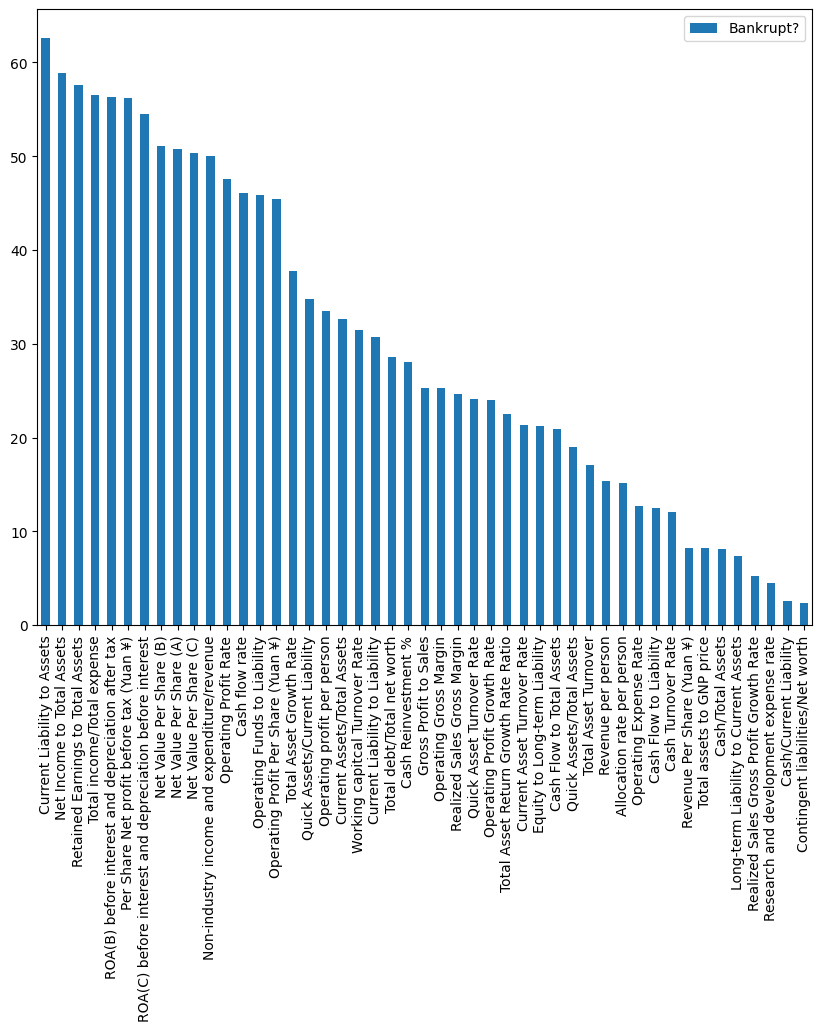

In [46]:
pd.DataFrame(abs(data_standardised.corr()['Bankrupt?'].drop('Bankrupt?')*100).sort_values(
ascending=False)).plot.bar(figsize = (10,8))

Usuwamy z zmiennych baranych pod uwagę zmienne których korelacja z minną objaśnianą jest poniżej 0,1

In [51]:
sort_orders= dict(sort_orders)
keys_to_drop=[]

for k in sort_orders.keys():
  if sort_orders.get(k) <= 0.1:
    keys_to_drop.append(k)
keys_to_drop  

['Revenue Per Share (Yuan ¥)',
 'Total assets to GNP price',
 'Cash/Total Assets',
 'Long-term Liability to Current Assets',
 'Realized Sales Gross Profit Growth Rate',
 'Research and development expense rate',
 'Cash/Current Liability',
 'Contingent liabilities/Net worth']

Sprawdzamy ile zmiennych powinnyśmy uwzględnić w PCA

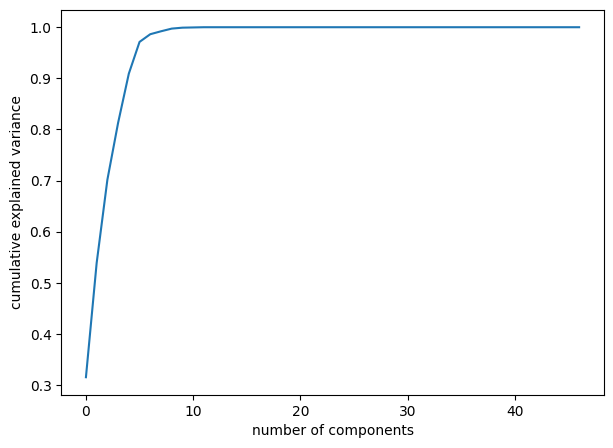

              0             1             2             3             4  \
0 -5.012286e+06 -2.540386e+09  1.340906e+09 -3.665516e+09  6.094849e+08   
1  3.997275e+08 -3.571381e+09  3.097916e+09 -2.388319e+09 -4.915615e+08   
2 -4.641148e+09  7.111957e+07 -1.623909e+09 -1.792689e+09 -2.345224e+09   
3  4.717788e+09 -3.133823e+09 -3.819591e+09 -7.647947e+08  6.272135e+08   
4  5.943845e+09  4.400721e+09 -1.190079e+09 -5.478359e+08 -1.026106e+08   

              5  
0 -5.776809e+08  
1 -8.230081e+08  
2 -8.584879e+08  
3 -1.153804e+09  
4  5.607357e+07  


In [50]:
exclude_filter = ~data_bankructwo.columns.isin(['Unnamed: 0', 'Bankrupt?'])

pca = PCA().fit(data_bankructwo.loc[:, exclude_filter])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.gcf().set_size_inches(7, 5)
plt.show()

pca = PCA(svd_solver='full', n_components=0.95)
principal_components = pca.fit_transform(data_bankructwo.loc[:, exclude_filter])
principal_df = pd.DataFrame(data=principal_components)

print(principal_df.head())



Na wykresie widać, że 6 pierwszych czynników może wyjaśnić ponad 95% całkowitej wariancji

PCA 2
=


In [52]:
# kolumny do wykluczenia (te na których nie chcemy PCA)
exclude_filter = ~data_standardised.columns.isin(['Bankrupt?','Revenue Per Share (Yuan ¥)',
 'Total assets to GNP price',
 'Cash/Total Assets',
 'Long-term Liability to Current Assets',
 'Realized Sales Gross Profit Growth Rate',
 'Research and development expense rate',
 'Cash/Current Liability',
 'Contingent liabilities/Net worth']) 
# liczba głównych składowych
pca = PCA(n_components = 6)
# przeliczenie
principal_components = pca.fit_transform(data_bankructwo.loc[:, exclude_filter])

Zmienne które uwzględniamy w modelu

In [53]:
principal_df = pd.DataFrame(data = principal_components)
principal_df['Bankrupt?'] = data_standardised['Bankrupt?']
principal_df

,0,1,2,3,4,5,Bankrupt?
0,-7.426063e+07,-2.749396e+09,1.324083e+09,-3.430619e+09,1.964347e+08,-2.442246e+07,1.0
1,3.532515e+08,-3.766228e+09,3.080852e+09,-1.918933e+09,-5.982474e+08,-1.257173e+07,1.0
2,-4.678150e+09,-2.393140e+08,-1.619692e+09,-8.106014e+08,-2.201132e+09,-4.615284e+07,1.0
3,4.691551e+09,-3.167590e+09,-3.829257e+09,-5.533621e+08,7.848283e+08,-7.473795e+06,1.0
4,5.786707e+09,4.446026e+09,-1.184175e+09,-5.935264e+08,-2.496464e+08,2.113386e+06,1.0
...,...,...,...,...,...,...,...
493,-1.484715e+09,-2.253143e+09,1.158818e+09,-2.509028e+09,-1.935790e+08,-2.753855e+07,0.0
494,2.625413e+09,-1.862243e+09,-4.982438e+09,-1.372228e+09,-1.208636e+09,-2.727334e+07,0.0
495,2.146124e+09,3.810513e+08,5.522473e+09,2.055350e+09,-8.364261e+08,1.830203e+07,0.0
496,8.626208e+09,3.743328e+09,-9.135107e+08,2.192260e+08,-3.481433e+08,1.762176e+07,0.0


Podzaił danych na testowe i uczące
https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

In [54]:
# Split the data into features (X) and target (y)
X = principal_df.drop('Bankrupt?', axis=1)
y = principal_df['Bankrupt?']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
y_train

463    0.0
246    0.0
21     1.0
479    0.0
179    1.0
      ... 
249    0.0
229    0.0
10     1.0
318    0.0
209    1.0
Name: Bankrupt?, Length: 398, dtype: float64

In [42]:
y_test

157    1.0
45     1.0
37     1.0
126    1.0
233    0.0
      ... 
69     1.0
371    0.0
13     1.0
276    0.0
120    1.0
Name: Bankrupt?, Length: 100, dtype: float64

Szukanie wektórów własnych